<a href="https://colab.research.google.com/github/AngleKit/MSE7530Codes/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Instructions: Please work through this notebook. Anything in <font color='red'> red </font> requires an answer in a code and/or text cell, as indicated. Please leave all of the text I have written; I have arranged the notebook so that I can easily navigate to your answers and skip my own explanations.

## Part 1 : Accessing a Database & Plotting Results

### Python Practice : for loops
https://www.w3schools.com/python/python_for_loops.asp  
We will talk more about loops in detail, but for now, we will learn by doing. A for loop will do just that: for every "thing" in a list/string/etc., the code will do something.


#### Explanations

In [1]:
for x in [1., 6., 7.]:
  print(x*3)

3.0
18.0
21.0


This can be done for many different data types. For example, we can have a list full of strings instead and do the same thing.

In [2]:
for l in ['OFET', 'OLED', 'OMIEC']:
  print(l)
print('Alternatively,')
for w in 'OFET':
  print(w)

OFET
OLED
OMIEC
Alternatively,
O
F
E
T


Something useful that we can use (not quite related) are "f-strings". These provide a convenient way to insert strings, integers, or floats, etc. into existing strings. This can be helpful to add a little more context. Take our previous example,

In [3]:
for x in [1., 6., 7.]:
  multiplier = 3
  print(f'The value of x ({x}) multiplied by {multiplier} is {x*3}')

The value of x (1.0) multiplied by 3 is 3.0
The value of x (6.0) multiplied by 3 is 18.0
The value of x (7.0) multiplied by 3 is 21.0


We can use that to make complete strings, as well. For example, (HINT), if we have a dictionary (again, more on these later) which uses strings to access values

In [4]:
mw_dict = {'benzene' :78.11 , 'toluene' : 92.141 , 'propane' : 44.097} # makes a bunch of key/value pairs, which we can reference
desired = 'benzene'
print(f'The molecular weight of {desired} is {mw_dict[desired]}')

The molecular weight of benzene is 78.11


In [5]:
key_list = mw_dict.keys()
print(key_list)

dict_keys(['benzene', 'toluene', 'propane'])


In [6]:
for k in key_list:
  print(f'The molecular weight of {k} is {mw_dict[k]}')

The molecular weight of benzene is 78.11
The molecular weight of toluene is 92.141
The molecular weight of propane is 44.097


#### <font color = 'red'> Practice: write a for loop that:</font>  
Converts the following values of energy in eV to J and prints them out. The conversion factor between the two energy units is $1 eV = 1.602 \times 10^{-19} J$.

In [14]:
energies = [100., 1230., 2000., 3600.]
# convert eV to J
for e in energies:
  print(f'The converted value for {e} eV is {e*1.602e-19} J')

The converted value for 100.0 eV is 1.602e-17 J
The converted value for 1230.0 eV is 1.97046e-16 J
The converted value for 2000.0 eV is 3.204e-16 J
The converted value for 3600.0 eV is 5.7672e-16 J


### NIST WebBook

#### Similarly to what we did in class: <font color = 'red'> Compare the IR and UV-vis spectra for 3 different series of molecules by loading the data, plotting on a common axis (or axes) that facilitates comparison, and qualitatively explaining any trends you see with each series.

##### <font color = 'red'> Series 1: ethane, ethylene, ethyne (acetylene) </font>

In [35]:

# the standard cell
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

! pip install nistchempy
! pip install jcamp
import nistchempy as nist
import jcamp as jc


In [47]:
# ethane, ethylene, ethyne (acetylene)
molecules = ['ethane', 'ethylene', 'ethyne']
# ethane
search_results1 = nist.run_search(identifier = molecules[0], search_type = 'name')
ane = search_results1.compounds[0]
ane.get_ir_spectra()
ane.get_uv_spectra()
# ethylene
search_results2 = nist.run_search(identifier = molecules[1], search_type = 'name')
ene = search_results2.compounds[0]
ene.get_ir_spectra()
ene.get_uv_spectra()
# acetylene
search_results3 = nist.run_search(identifier = molecules[2], search_type = 'name')
yne = search_results3.compounds[0]
yne.get_ir_spectra()
yne.get_uv_spectra()

output_dir = 'nist_spectra'
os.makedirs(output_dir, exist_ok=True)
# Save the mass spectra to the directory
ene.save_ir_spectra(output_dir)
ane.save_ir_spectra(output_dir)
yne.save_ir_spectra(output_dir)

ene.save_uv_spectra(output_dir)
ane.save_uv_spectra(output_dir)
yne.save_uv_spectra(output_dir)

In [48]:
# show number or spectra
#ir
print(ane.ir_specs)
print(ene.ir_specs)
print(yne.ir_specs)
#uv
print(ane.uv_specs)
print(ene.uv_specs)
print(yne.uv_specs)


[Spectrum(C74840, IR spectrum #0), Spectrum(C74840, IR spectrum #1)]
[Spectrum(C74851, IR spectrum #0), Spectrum(C74851, IR spectrum #1), Spectrum(C74851, IR spectrum #10)]
[]
[]
[]
[]


In [49]:
ane1 = jc.jcamp_readfile('/content/nist_spectra/C74840_IR_0.jdx')
ane2 = jc.jcamp_readfile('/content/nist_spectra/C74840_IR_1.jdx')

ene1 = jc.jcamp_readfile('/content/nist_spectra/C74851_IR_0.jdx')
ene2 = jc.jcamp_readfile('/content/nist_spectra/C74851_IR_1.jdx')
ene3 = jc.jcamp_readfile('/content/nist_spectra/C74851_IR_10.jdx')

ane_list = [ane1,ane2]
ene_list = [ene1,ene2,ene3]

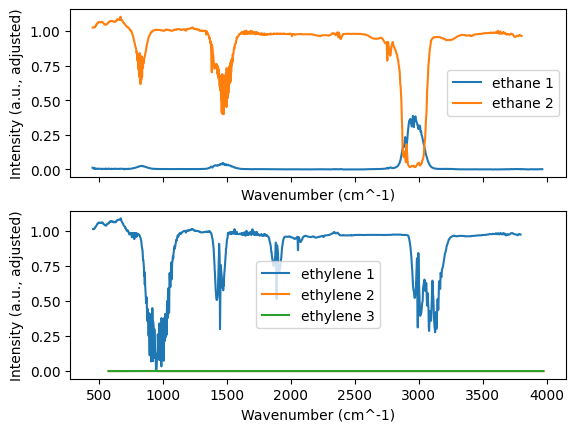

In [55]:
fig, ax = plt.subplots(2,1,sharex=True)
s = 1
for n in ane_list:
  ax[0].plot(n['x'],n['y'],label=f'ethane {s}')
  s += 1
s=1
for c in ene_list:
  ax[1].plot(c['x'],c['y'],label=f'ethylene {s}')
  s += 1
for a in ax:
  a.legend()
  a.set_xlabel('Wavenumber (cm^-1)')
  a.set_ylabel('Intensity (a.u., adjusted)')

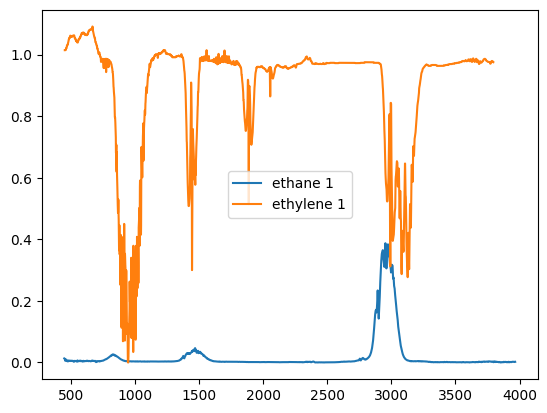

In [60]:
fig, ax = plt.subplots()
ax.plot(ane1['x'],ane1['y'],label='ethane 1')
ax.plot(ene1['x'],ene1['y'],label='ethylene 1')
ax.legend()

<font color = 'red'> Use this text box to describe any trends you see along the series. A few sentences is fine.

Answer: First  I found only ethane and ethylene had values to graph. as well as the spectra for ethylene of ene2 and ene3, were both every similar and very low. Comparing the two, I saw that ethane spectra has show stronger absorption bands at higher wavenumbers range.In contrast the ethylene spectra had multiple areas of peak absorption in spec 1, while its other two were extremely low.

There was no uv spectra to compare.

##### <font color = 'red'> Series 2: methane, ethane, propane, butane, pentane </font>

In [66]:
# methane, ethane, propane, butane, pentane
molecules = ['methane', 'ethane', 'propane', 'butane', 'pentane']
# eearch for results
search_results1 = nist.run_search(identifier = molecules[0], search_type = 'name')
meth = search_results1.compounds[0]
search_results2 = nist.run_search(identifier = molecules[1], search_type = 'name')
etha = search_results2.compounds[0]
search_results3 = nist.run_search(identifier = molecules[2], search_type = 'name')
prop = search_results3.compounds[0]
search_results4 = nist.run_search(identifier = molecules[3], search_type = 'name')
buta = search_results4.compounds[0]
search_results5 = nist.run_search(identifier = molecules[4], search_type = 'name')
pent = search_results5.compounds[0]
comp_list = ['meth', 'etha', 'prop', 'buta', 'pent'] # create compound list
# get ir and uv spectra
for c in comp_list:
  exec(f'{c}.get_ir_spectra()')
  exec(f'{c}.get_uv_spectra()')
# save ir and uv
for c in comp_list:
  exec(f'{c}.save_ir_spectra(output_dir)')
  exec(f'{c}.save_uv_spectra(output_dir)')
# print Specturm to evaulate
for c in comp_list:
  print(eval(f'{c}.ir_specs'))
  print(eval(f'{c}.uv_specs'))

[Spectrum(C74828, IR spectrum #0), Spectrum(C74828, IR spectrum #1)]
[]
[Spectrum(C74840, IR spectrum #0), Spectrum(C74840, IR spectrum #1)]
[]
[Spectrum(C74986, IR spectrum #0)]
[]
[]
[]
[]
[]


In [68]:
meth1 = jc.jcamp_readfile('/content/nist_spectra/C74828_IR_0.jdx')
meth2 = jc.jcamp_readfile('/content/nist_spectra/C74828_IR_1.jdx')
meth_list = [meth1,meth2]

etha1 = jc.jcamp_readfile('/content/nist_spectra/C74840_IR_0.jdx')
etha2 = jc.jcamp_readfile('/content/nist_spectra/C74840_IR_1.jdx')
etha_list = [etha1,etha2]

prop1 = jc.jcamp_readfile('/content/nist_spectra/C74986_IR_0.jdx')
prop_list = [prop1]

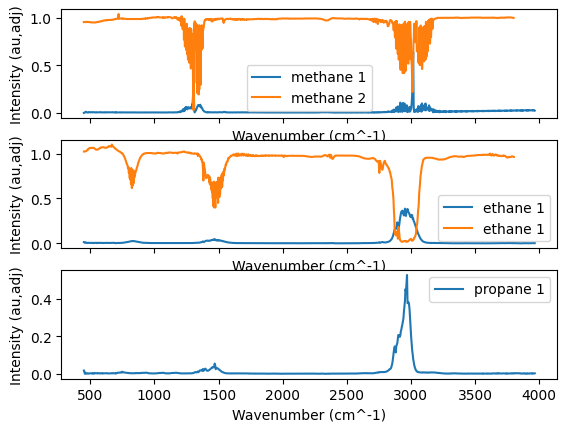

In [73]:
fig, ax = plt.subplots(3,1,sharex=True)
s = 1
for n in meth_list:
  ax[0].plot(n['x'],n['y'],label=f'methane {s}')
  s += 1
s=1
for c in etha_list:
  ax[1].plot(c['x'],c['y'],label=f'ethane {s}')
  s += 1
  s=1
for i in prop_list:
  ax[2].plot(i['x'],i['y'],label=f'propane {s}')
  s += 1
for a in ax:
  a.legend()
  a.set_xlabel('Wavenumber (cm^-1)')
  a.set_ylabel('Intensity (au,adj)')

<font color = 'red'> Use this text box to describe any trends you see along the series. A few sentences is fine.

##### <font color = 'red'> Series 3: cyclopropane, cyclobutane, cyclopentane, cyclohexane, benzene </font>

In [75]:
# cyclopropane, cyclobutane, cyclopentane, cyclohexane, benzene
molecules = ['cyclopropane', 'cyclobutane', 'cyclopentane', 'cyclohexane', 'benzene']
# eearch for results
search_results1 = nist.run_search(identifier = molecules[0], search_type = 'name')
cprop = search_results1.compounds[0]
search_results2 = nist.run_search(identifier = molecules[1], search_type = 'name')
cbuta = search_results2.compounds[0]
search_results3 = nist.run_search(identifier = molecules[2], search_type = 'name')
cpent = search_results3.compounds[0]
search_results4 = nist.run_search(identifier = molecules[3], search_type = 'name')
chexa = search_results4.compounds[0]
search_results5 = nist.run_search(identifier = molecules[4], search_type = 'name')
benz = search_results5.compounds[0]
comp_list = ['cprop', 'cbuta', 'cpent', 'chexa', 'benz'] # create compound list
# get ir and uv spectra
for c in comp_list:
  exec(f'{c}.get_ir_spectra()')
  exec(f'{c}.get_uv_spectra()')
# save ir and uv
for c in comp_list:
  exec(f'{c}.save_ir_spectra(output_dir)')
  exec(f'{c}.save_uv_spectra(output_dir)')
# print Specturm to evaulate
for c in comp_list:
  print(eval(f'{c}.ir_specs'))
  print(eval(f'{c}.uv_specs'))

[Spectrum(C75194, IR spectrum #0), Spectrum(C75194, IR spectrum #1), Spectrum(C75194, IR spectrum #2)]
[]
[]
[]
[Spectrum(C287923, IR spectrum #0), Spectrum(C287923, IR spectrum #1)]
[]
[]
[]
[]
[]


In [76]:
cprop1 = jc.jcamp_readfile('/content/nist_spectra/C75194_IR_0.jdx')
cprop2 = jc.jcamp_readfile('/content/nist_spectra/C75194_IR_1.jdx')
cprop3 = jc.jcamp_readfile('/content/nist_spectra/C75194_IR_2.jdx')
cprop_list = [cprop1,cprop2, cprop3]

cpent1 = jc.jcamp_readfile('/content/nist_spectra/C287923_IR_0.jdx')
cpent2 = jc.jcamp_readfile('/content/nist_spectra/C287923_IR_1.jdx')
cpent_list = [cpent1,cpent2]


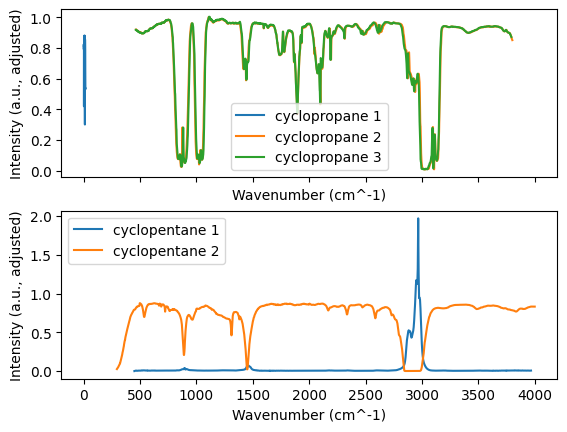

In [78]:
fig, ax = plt.subplots(2,1,sharex=True)
s = 1
for n in cprop_list:
  ax[0].plot(n['x'],n['y'],label=f'cyclopropane {s}')
  s += 1
s=1
for c in cpent_list:
  ax[1].plot(c['x'],c['y'],label=f'cyclopentane {s}')
  s += 1
for a in ax:
  a.legend()
  a.set_xlabel('Wavenumber (cm^-1)')
  a.set_ylabel('Intensity (a.u., adjusted)')

<font color = 'red'> Use this text box to describe any trends you see along the series. A few sentences is fine.

### Polymer Sorting for Recycling
You can find data for this exercise at https://github.com/usnistgov/nir_corr_po . The accompanying publication (which is cool) can be found at https://doi.org/10.1021/acs.macromol.3c02290 . It is not necessary to read, but it may provide some context for your qualitative answers.  
The following two exercises ask you to comment on the reproducibility of the measurements. Since we have not gone over any quantification principles in class yet, these may be purely qualitative for full credit.

##### <font color='red'> Assess the reproducibility of the measurement. </font>
Pick a single polymer (same code (e.g. H0002)) and plot the 6 NIR spectra collected on a single axis. Comment on the qualitative reproducibility of the measurement.

In [11]:
# code here; insert as many cells as you need

<font color = red> Qualitative answer in this text box.

##### <font color='red'> Assess the uniformity of a single polymer's NIR spectrum between different suppliers. </font>
Plot the data from each type of LDPE on the same axis - sample codes S0081, S0024, N1476, N1473, and H0002. Comment on the qualitative agreement between spectra and if it would be easy to use these to identify LDPE in a mixed recycling stream.

In [12]:
# code here; insert as many cells as you need

<font color = 'red'> Qualitative answer in this box.

## Part 2: Reflecting on FAIR Data principles.
No code!

## Part 3: Case study - an OFET database
No code!